In [3]:
import pandas as pd
import numpy as np
from openai import OpenAI
import dotenv
import os

In [4]:
def get_embedding(review, client, model="text-embedding-ada-002"):
    return client.embeddings.create(input = [review], model=model).data[0].embedding

In [5]:
# initialize OpenAI client for API calls
client = OpenAI(
    api_key = os.getenv('OPENAI_API_KEY'),
)

In [25]:
# load all 12k+ reviews into dataframe
reviews = pd.read_csv('reviews.csv')

In [27]:
# chunk the 12000+ reviews into smaller blocks for embedding generation
chunk_size = 1000
chunk_number = 1
for start_row in range(0, len(reviews), chunk_size):
    end_row = start_row + chunk_size
    chunk = reviews[start_row:end_row]
    output_file = f'reviewChunks/reviews{chunk_number}.csv'
    chunk.to_csv(output_file, index=False)
    chunk_number += 1

In [30]:
# generate embeddings for each chunk
for file in os.listdir('reviewChunks'):
    chunkdf = pd.read_csv(f'reviewChunks/{file}')
    chunkdf['embedding'] = chunkdf['content'].apply(lambda x : get_embedding(x, client=client))
    chunkdf.to_csv(f'embeddedChunks/{file}')


In [31]:
# combine the chunked csvs to consolidate into a single csv
chunk1 = pd.read_csv('embeddedChunks/reviews1.csv')
chunk2 = pd.read_csv('embeddedChunks/reviews2.csv')
chunk3 = pd.read_csv('embeddedChunks/reviews3.csv')
chunk4 = pd.read_csv('embeddedChunks/reviews4.csv')
chunk5 = pd.read_csv('embeddedChunks/reviews5.csv')
chunk6 = pd.read_csv('embeddedChunks/reviews6.csv')
chunk7 = pd.read_csv('embeddedChunks/reviews7.csv')
chunk8 = pd.read_csv('embeddedChunks/reviews8.csv')
chunk9 = pd.read_csv('embeddedChunks/reviews9.csv')
chunk10 = pd.read_csv('embeddedChunks/reviews10.csv')
chunk11 = pd.read_csv('embeddedChunks/reviews11.csv')
chunk12 = pd.read_csv('embeddedChunks/reviews12.csv')
chunk13 = pd.read_csv('embeddedChunks/reviews13.csv')

merged_chunks = pd.concat([chunk1, chunk2, chunk3, chunk4, chunk5, chunk6, chunk7, chunk8, chunk9, chunk10, chunk11, chunk12, chunk13], ignore_index=True)

In [32]:
merged_chunks.to_csv('embedded_reviews.csv')

In [33]:
merged_chunks

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId,embedding
0,0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo,"[-0.022039921954274178, -0.005768859758973122,..."
1,1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo,"[-0.01856212504208088, -0.013627409003674984, ..."
2,2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo,"[-0.007003527134656906, -0.002145164180546999,..."
3,3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo,"[-0.023214763030409813, -0.01604713499546051, ..."
4,4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo,"[-0.03402910754084587, -0.021251743659377098, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12490,490,gp:AOqpTOEQPqib7pb6vFyjMY9JEfsMs_u8WCdqg6mbcar...,Mildred Olima,https://play-lh.googleusercontent.com/a-/AOh14...,"I really like the planner, it helps me achieve...",5,0,4.5.4,2018-12-21 00:13:09,NaN,NaN,newest,com.appxy.planner,"[-0.027381381019949913, 0.0034523489885032177,..."
12491,491,gp:AOqpTOE1KKOOVVKUfhAfXQs2NfJpoywfucrJCMK3Hmu...,Roaring Grizzly Bear,https://play-lh.googleusercontent.com/a-/AOh14...,😁****😁,5,0,NaN,2018-12-12 21:52:56,NaN,NaN,newest,com.appxy.planner,"[-0.012810387648642063, -0.005934905260801315,..."
12492,492,gp:AOqpTOFEn5UgYYggqiHKauDJVLLN8-16nk1AfZbEhkj...,amirbadang,https://play-lh.googleusercontent.com/-CM2FcrU...,Very useful apps. You must try it,5,0,4.5.4,2018-12-11 15:49:43,NaN,NaN,newest,com.appxy.planner,"[-0.007603992708027363, 0.010598715394735336, ..."
12493,493,gp:AOqpTOHOH6YdYLR91qZdYpeIVkMI-LeAE0EwYgrctid...,Emma Stebbins,https://play-lh.googleusercontent.com/-oCj6g6k...,Would pay for this if there were even more add...,5,0,4.5.4,2018-12-06 04:59:26,NaN,NaN,newest,com.appxy.planner,"[-0.014248356223106384, 0.005960455164313316, ..."


In [6]:
# use this line when executing the notebook for the first time
#df = merged_chunks
# use this line when executing the notebook in a fresh compute instance,
# after the merged csv has already been generated:
df = pd.read_csv('embedded_reviews.csv')

In [7]:
# when extracting the embeddings from the csv, they are interpreted as string literals
# this function converts these embeddings back to float lists, for use in machine learning tasks
def string_to_list(emb_str):
    trimmed = emb_str.strip('[')
    trimmed = trimmed.strip(']')
    tokens = trimmed.split(', ')
    float_list = []
    for token in tokens:
        float_list.append(float(token))
    return float_list

In [8]:
df['converted_embedding'] = df['embedding'].apply(lambda x : string_to_list(x))

In [9]:
df['embedding'][0]

'[-0.022039921954274178, -0.005768859758973122, 0.0037489598616957664, -0.01876717247068882, -0.038326963782310486, 0.03073316067457199, -0.014663451351225376, -0.023535670712590218, 0.013333896175026894, 0.004790870472788811, 0.019483085721731186, -0.006107640452682972, -0.0019320087740197778, -0.0224362313747406, -0.011646385304629803, 0.0041005248203873634, 0.022410662844777107, -0.0031560936477035284, -0.008610143326222897, -0.001960773253813386, -0.01741204969584942, 0.01921461895108223, 0.0009500241721980274, -0.025708980858325958, 0.0019208225421607494, -0.01599300466477871, -0.00333667011000216, -0.024852439761161804, 0.0017514321953058243, -0.015046976506710052, 0.01853705756366253, 0.009511427953839302, -0.01756545901298523, -0.012963155284523964, -0.0233183391392231, -0.0013111771550029516, 0.006293011363595724, -0.021502986550331116, 0.002334710443392396, -0.008354459889233112, 0.00015490826626773924, 0.00487716356292367, -0.017833927646279335, -0.01576288975775242, -0.0412

In [10]:
df['converted_embedding'][0]

[-0.022039921954274178,
 -0.005768859758973122,
 0.0037489598616957664,
 -0.01876717247068882,
 -0.038326963782310486,
 0.03073316067457199,
 -0.014663451351225376,
 -0.023535670712590218,
 0.013333896175026894,
 0.004790870472788811,
 0.019483085721731186,
 -0.006107640452682972,
 -0.0019320087740197778,
 -0.0224362313747406,
 -0.011646385304629803,
 0.0041005248203873634,
 0.022410662844777107,
 -0.0031560936477035284,
 -0.008610143326222897,
 -0.001960773253813386,
 -0.01741204969584942,
 0.01921461895108223,
 0.0009500241721980274,
 -0.025708980858325958,
 0.0019208225421607494,
 -0.01599300466477871,
 -0.00333667011000216,
 -0.024852439761161804,
 0.0017514321953058243,
 -0.015046976506710052,
 0.01853705756366253,
 0.009511427953839302,
 -0.01756545901298523,
 -0.012963155284523964,
 -0.0233183391392231,
 -0.0013111771550029516,
 0.006293011363595724,
 -0.021502986550331116,
 0.002334710443392396,
 -0.008354459889233112,
 0.00015490826626773924,
 0.00487716356292367,
 -0.01783392

In [11]:
# convert embeddings to a format compatible with sklearn kmeans
embeddings = pd.DataFrame(df['converted_embedding'].tolist())

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

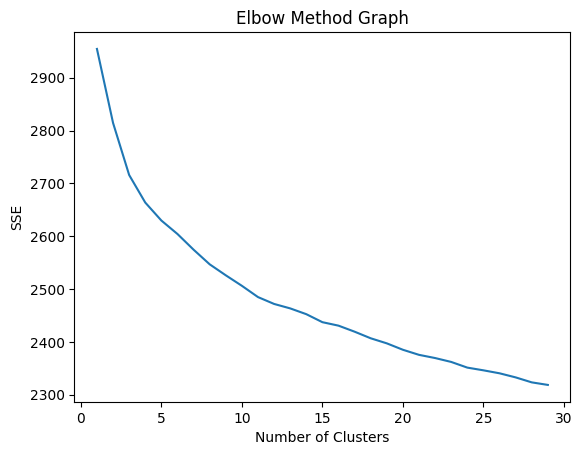

In [82]:
# generate elbow chart to determine ideal value for k

sse = {}
for i in range(1,30):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(embeddings)
    sse[i] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method Graph")
plt.show()

In [14]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit(embeddings)

In [15]:
# function to calculate and print various cluster metrics

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

def print_cluster_metrics(embeddings, clusters, kmeans):
    print("Inertia", kmeans.inertia_)
    sil = silhouette_score(embeddings, kmeans.labels_)
    print("Silhouette Score:", sil)
    dav = davies_bouldin_score(embeddings, kmeans.labels_)
    print("Davies-Bouldin Index:", dav)

In [16]:
print_cluster_metrics(embeddings, clusters, kmeans)


Inertia 2506.7274004136875
Silhouette Score: 0.026100970141151526
Davies-Bouldin Index: 4.227677959246422
